In [ ]:
#hide
#default_exp motif
from nbdev.showdoc import show_doc
from IPython.display import HTML
%load_ext autoreload
%autoreload 2

# motif

>Processing and analyzing glycan sequences on a motif-basis

In [ ]:
#export
from glycowork.motif.analysis import *
from glycowork.motif.annotate import *
from glycowork.motif.graph import *
from glycowork.motif.processing import *
from glycowork.motif.query import *
from glycowork.motif.tokenization import *
from glycowork.glycan_data.loader import df_species

`motif` contains many functions to process glycans in various ways and use this processing analyze glycans via curated motifs, graph features, and sequence features. It contains the following modules:

- `analysis` contains functions for downstream analyses of important glycan motifs etc.
- `annotate` contains functions to extract curated motifs, graph features, and sequence features from glycan sequences
- `graph` is used to convert glycan sequences to graphs and contains helper functions to search for motifs / check whether two sequences describe the same sequence, etc.
- `processing` contains all the basic functions to process IUPACcondensed glycan sequences into glycoletters etc. Also contains `get_lib` to construct the glycoletter library
- `query` is used to interact with the databases contained in glycowork, delivering insights for sequences of interest
- `tokenization` has helper functions to map glycans (strings) to numbers that can be used by models

# analysis
 >downstream analyses of important glycan motifs

In [ ]:
show_doc(get_pvals_motifs)

<h4 id="get_pvals_motifs" class="doc_header"><code>get_pvals_motifs</code><a href="https://github.com/BojarLab/glycoworkglycowork/motif/analysis.py#L11" class="source_link" style="float:right">[source]</a></h4>

> <code>get_pvals_motifs</code>(**`df`**, **`glycan_col_name`**, **`label_col_name`**, **`libr`**=*`None`*, **`thresh`**=*`1.645`*, **`sorting`**=*`True`*, **`feature_set`**=*`['exhaustive']`*)

returns enriched motifs based on label data or predicted data

df -- dataframe containing glycan sequences and labels

glycan_col_name -- column name for glycan sequences; string

label_col_name -- column name for labels; string

libr -- sorted list of unique glycoletters observed in the glycans of our dataset

thresh -- threshold value to separate positive/negative; default is 1.645 for Z-scores

sorting -- whether p-value dataframe should be sorted ascendingly; default: True

feature_set -- which feature set to use for annotations, add more to list to expand; default is 'exhaustive'

             options are: 'known' (hand-crafted glycan features), 'graph' (structural graph features of glycans)
                           and 'exhaustive' (all mono- and disaccharide features)


returns dataframe with p-values and corrected p-values for every glycan motif

In [ ]:
glycans = ['Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc',
           'Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcOPN(b1-6)GlcOPN',
          'Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'Glc(b1-3)Glc(b1-3)Glc']
label = [3.234, 2.423, 0.733, 3.102, 0.108]
test_df = pd.DataFrame({'glycan':glycans, 'binding':label})

print("Glyco-Motif enrichment p-value test")
HTML(get_pvals_motifs(test_df, 'glycan', 'binding').iloc[:10,:].to_html())

Glyco-Motif enrichment p-value test


,motif,pval,corr_pval
4,GlcNAc,0.013469,0.394527
19,b1-4,0.013469,0.394527
8,Man,0.025198,0.590671
11,a1-3,0.025636,0.590671
34,Man*a1-6*Man,0.091752,0.958241
33,Man*a1-3*Man,0.091752,0.958241
26,GlcNAc*b1-4*GlcNAc,0.091752,0.958241
35,Man*b1-4*GlcNAc,0.091752,0.958241
13,a1-6,0.091752,0.958241
10,a1-2,0.130826,0.980276


In [ ]:
show_doc(make_heatmap)

<h4 id="make_heatmap" class="doc_header"><code>make_heatmap</code><a href="https://github.com/BojarLab/glycoworkglycowork/motif/analysis.py#L47" class="source_link" style="float:right">[source]</a></h4>

> <code>make_heatmap</code>(**`df`**, **`mode`**=*`'sequence'`*, **`libr`**=*`None`*, **`feature_set`**=*`['known']`*)

clusters samples based on glycan data (for instance glycan binding etc.)

df -- dataframe with glycan data, rows are samples and columns are glycans

mode -- whether glycan 'sequence' or 'motif' should be used for clustering; default:sequence

libr -- sorted list of unique glycoletters observed in the glycans of our dataset

feature_set -- which feature set to use for annotations, add more to list to expand; default is 'exhaustive'

             options are: 'known' (hand-crafted glycan features), 'graph' (structural graph features of glycans)
                           and 'exhaustive' (all mono- and disaccharide features)


prints clustermap                         

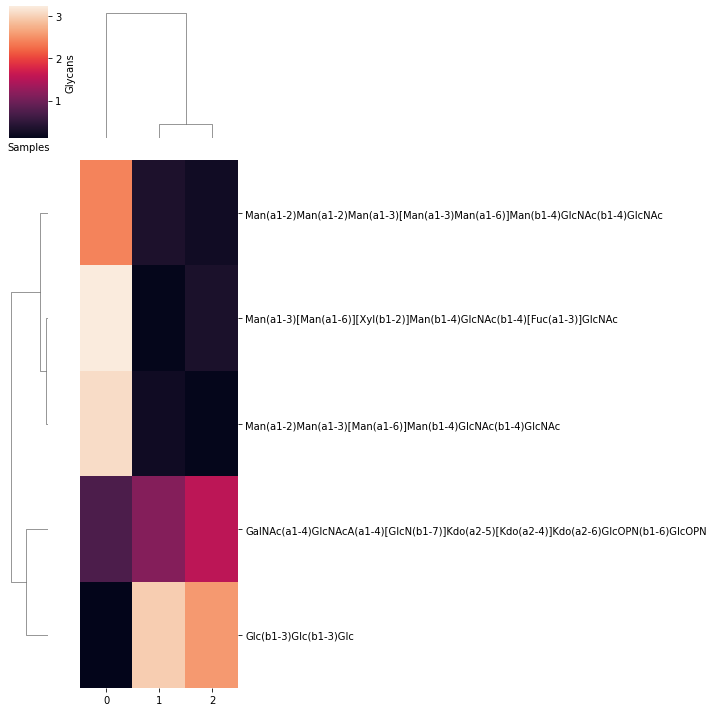

In [ ]:
glycans = ['Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc',
           'Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcOPN(b1-6)GlcOPN',
           'Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'Glc(b1-3)Glc(b1-3)Glc']
label = [3.234, 2.423, 0.733, 3.102, 0.108]
label2 = [0.134, 0.345, 1.15, 0.233, 2.981]
label3 = [0.334, 0.245, 1.55, 0.133, 2.581]
test_df = pd.DataFrame([label, label2, label3], columns = glycans)

make_heatmap(test_df)

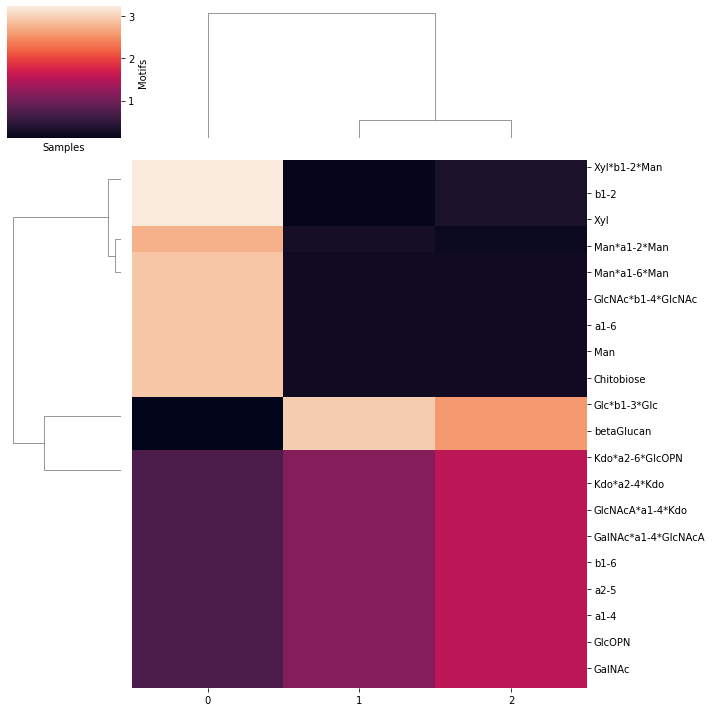

In [ ]:
make_heatmap(test_df, mode = 'motif', feature_set = ['known', 'exhaustive'])

# annotate
>extract curated motifs, graph features, and sequence features from glycan sequences

In [ ]:
show_doc(annotate_glycan)

<h4 id="annotate_glycan" class="doc_header"><code>annotate_glycan</code><a href="https://github.com/BojarLab/glycoworkglycowork/motif/annotate.py#L7" class="source_link" style="float:right">[source]</a></h4>

> <code>annotate_glycan</code>(**`glycan`**, **`motifs`**=*`None`*, **`libr`**=*`None`*)

searches for known motifs in glycan sequence

glycan -- IUPACcondensed glycan sequence (string)

motifs -- dataframe of glycan motifs (name + sequence)

libr -- sorted list of unique glycoletters observed in the glycans of our dataset


returns dataframe with absence/presence of motifs in glycan

In [ ]:
HTML(annotate_glycan('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc').to_html())

,LewisX,LewisY,SialylLewisX,SulfoSialylLewisX,LewisA,LewisB,SialylLewisA,SulfoLewisA,H_type2,H_type1,A_antigen,B_antigen,Galili_antigen,GloboH,Gb5,Gb4,Gb3,3SGb3,8DSGb3,3SGb4,8DSGb4,6DSGb4,3SGb5,8DSGb5,6DSGb5,6DSGb5_2,6SGb3,8DSGb3_2,6SGb4,8DSGb4_2,6SGb5,8DSGb5_2,66DSGb5,Forssman_antigen,iGb3,I_antigen,i_antigen,PI_antigen,Chitobiose,Trimannosylcore,LacNAc_type1,LacNAc_type2,LacdiNAc_type1,LacdiNAc_type2,bisecting,VIM,PolyLacNAc,Ganglio_Series,Lacto_Series,NeoLacto_Series,betaGlucan,KeratanSulfate,Hyluronan,Mollu_series,Arthro_series,Cellulose_like,Chondroitin_4S,GPI_anchor,Isoglobo_series,LewisD,Globo_series,SDA,Muco_series,Heparin,Peptidoglycan,Dermatansulfate,CAD,Lactosylceramide,Lactotriaosylceramide,LexLex,GM3,H_type3,GM2,GM1,cisGM1,VIM2,GD3,GD1a,GD2,GD1b,SDLex,Nglycolyl_GM2,Fuc_LN3,GT1b,GD1,GD1a,LcGg4,GT3,Disialyl_T_antigen,GT1a,GT2,GT1c,2Fuc_GM1,GQ1c,O_linked_mannose,GT1aa,GQ1b,HNK1,GQ1ba,O_mannose_Lex,2Fuc_GD1b,Sialopentaosylceramide,Sulfogangliotetraosylceramide,B-GM1,GQ1aa,bisSulfo-Lewis x,para-Forssman,core_fucose,GP1c,B-GD1b,GP1ca,Isoglobotetraosylceramide,polySia,high_mannose
Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
show_doc(annotate_dataset)

<h4 id="annotate_dataset" class="doc_header"><code>annotate_dataset</code><a href="https://github.com/BojarLab/glycoworkglycowork/motif/annotate.py#L26" class="source_link" style="float:right">[source]</a></h4>

> <code>annotate_dataset</code>(**`glycans`**, **`motifs`**=*`None`*, **`libr`**=*`None`*, **`feature_set`**=*`['known']`*)

wrapper function to annotate motifs in list of glycans

glycans -- list of IUPACcondensed glycan sequences (string)

motifs -- dataframe of glycan motifs (name + sequence)

libr -- sorted list of unique glycoletters observed in the glycans of our data

feature_set -- which feature set to use for annotations, add more to list to expand; default is 'known'

               options are: 'known' (hand-crafted glycan features), 'graph' (structural graph features of glycans)
                             and 'exhaustive' (all mono- and disaccharide features)

                             
returns dataframe of glycans (rows) and presence/absence of known motifs (columns)

In [ ]:
glycans = ['Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc',
           'Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcOPN(b1-6)GlcOPN']
print("Annotate Test")
HTML(annotate_dataset(glycans).to_html())

Annotate Test


,LewisX,LewisY,SialylLewisX,SulfoSialylLewisX,LewisA,LewisB,SialylLewisA,SulfoLewisA,H_type2,H_type1,A_antigen,B_antigen,Galili_antigen,GloboH,Gb5,Gb4,Gb3,3SGb3,8DSGb3,3SGb4,8DSGb4,6DSGb4,3SGb5,8DSGb5,6DSGb5,6DSGb5_2,6SGb3,8DSGb3_2,6SGb4,8DSGb4_2,6SGb5,8DSGb5_2,66DSGb5,Forssman_antigen,iGb3,I_antigen,i_antigen,PI_antigen,Chitobiose,Trimannosylcore,LacNAc_type1,LacNAc_type2,LacdiNAc_type1,LacdiNAc_type2,bisecting,VIM,PolyLacNAc,Ganglio_Series,Lacto_Series,NeoLacto_Series,betaGlucan,KeratanSulfate,Hyluronan,Mollu_series,Arthro_series,Cellulose_like,Chondroitin_4S,GPI_anchor,Isoglobo_series,LewisD,Globo_series,SDA,Muco_series,Heparin,Peptidoglycan,Dermatansulfate,CAD,Lactosylceramide,Lactotriaosylceramide,LexLex,GM3,H_type3,GM2,GM1,cisGM1,VIM2,GD3,GD1a,GD2,GD1b,SDLex,Nglycolyl_GM2,Fuc_LN3,GT1b,GD1,GD1a,LcGg4,GT3,Disialyl_T_antigen,GT1a,GT2,GT1c,2Fuc_GM1,GQ1c,O_linked_mannose,GT1aa,GQ1b,HNK1,GQ1ba,O_mannose_Lex,2Fuc_GD1b,Sialopentaosylceramide,Sulfogangliotetraosylceramide,B-GM1,GQ1aa,bisSulfo-Lewis x,para-Forssman,core_fucose,GP1c,B-GD1b,GP1ca,Isoglobotetraosylceramide,polySia,high_mannose
Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcOPN(b1-6)GlcOPN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
print("Annotate Test with Graph Features")
HTML(annotate_dataset(glycans, feature_set = ['known', 'graph']).to_html())

Annotate Test with Graph Features


,LewisX,LewisY,SialylLewisX,SulfoSialylLewisX,LewisA,LewisB,SialylLewisA,SulfoLewisA,H_type2,H_type1,A_antigen,B_antigen,Galili_antigen,GloboH,Gb5,Gb4,Gb3,3SGb3,8DSGb3,3SGb4,8DSGb4,6DSGb4,3SGb5,8DSGb5,6DSGb5,6DSGb5_2,6SGb3,8DSGb3_2,6SGb4,8DSGb4_2,6SGb5,8DSGb5_2,66DSGb5,Forssman_antigen,iGb3,I_antigen,i_antigen,PI_antigen,Chitobiose,Trimannosylcore,LacNAc_type1,LacNAc_type2,LacdiNAc_type1,LacdiNAc_type2,bisecting,VIM,PolyLacNAc,Ganglio_Series,Lacto_Series,NeoLacto_Series,betaGlucan,KeratanSulfate,Hyluronan,Mollu_series,Arthro_series,Cellulose_like,Chondroitin_4S,GPI_anchor,Isoglobo_series,LewisD,Globo_series,SDA,Muco_series,Heparin,Peptidoglycan,Dermatansulfate,CAD,Lactosylceramide,Lactotriaosylceramide,LexLex,GM3,H_type3,GM2,GM1,cisGM1,VIM2,GD3,GD1a,GD2,GD1b,SDLex,Nglycolyl_GM2,Fuc_LN3,GT1b,GD1,GD1a,LcGg4,GT3,Disialyl_T_antigen,GT1a,GT2,GT1c,2Fuc_GM1,GQ1c,O_linked_mannose,GT1aa,GQ1b,HNK1,GQ1ba,O_mannose_Lex,2Fuc_GD1b,Sialopentaosylceramide,Sulfogangliotetraosylceramide,B-GM1,GQ1aa,bisSulfo-Lewis x,para-Forssman,core_fucose,GP1c,B-GD1b,GP1ca,Isoglobotetraosylceramide,polySia,high_mannose,diameter,branching,nbrLeaves,avgDeg,varDeg,maxDeg,nbrDeg4,max_deg_leaves,mean_deg_leaves,deg_assort,betweeness,betwVar,betwMax,eigenMax,eigenMin,eigenAvg,eigenVar,closeMax,closeMin,closeAvg,closeVar,flowMax,flowAvg,flowVar,flow_edgeMax,flow_edgeMin,flow_edgeAvg,flow_edgeVar,loadMax,loadAvg,loadVar,harmMax,harmMin,harmAvg,harmVar,secorderMax,secorderMin,secorderAvg,secorderVar,size_corona,size_core,nbr_node_types,egap,entropyStation,N,dens
Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8.0,1.0,4.0,1.846154,0.591716,4.0,1.0,4.0,4.0,-3.448276e-02,0.240093,0.051241,0.727273,0.337083,0.251423,0.276471,0.000487,0.400000,0.181818,0.288591,0.003994,0.727273,0.240093,0.051241,0.318182,0.090909,0.179293,0.006460,0.727273,0.240093,0.051241,6.950000,3.253571,4.820330,0.908780,66.603303,26.305893,44.589784,127.751200,4.0,13.0,13.0,0.034262,-2.390521,13.0,12.0
Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.0,1.0,3.0,1.866667,0.248889,3.0,0.0,3.0,3.0,-2.396231e-15,0.263004,0.037282,0.703297,0.288267,0.234925,0.257853,0.000179,0.341463,0.157303,0.238951,0.003059,0.703297,0.263004,0.037282,0.296703,0.076923,0.182104,0.005067,0.703297,0.263004,0.037282,6.616667,3.407937,4.921958,0.799295,70.823725,26.381812,48.985176,174.452553,3.0,15.0,15.0,0.043739,-2.621893,15.0,14.0
GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcOPN(b1-6)GlcOPN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.0,2.0,4.0,1.866667,0.382222,3.0,0.0,4.0,4.0,-1.449275e-02,0.239560,0.044684,0.615385,0.287575,0.234359,0.257668,0.000274,0.350000,0.172840,0.255611,0.003247,0.615385,0.239560,0.044684,0.307692,0.076923,0.169545,0.006240,0.615385,0.239560,0.044684,6.616667,3.563492,5.083122,0.950051,66.992537,28.248894,47.236515,150.711681,4.0,15.0,15.0,0.025865,-2.680266,15.0,14.0


In [ ]:
print("Annotate Test with Everything")
HTML(annotate_dataset(glycans, feature_set = ['known', 'graph', 'exhaustive']).to_html())

Annotate Test with Everything


,LewisX,LewisY,SialylLewisX,SulfoSialylLewisX,LewisA,LewisB,SialylLewisA,SulfoLewisA,H_type2,H_type1,A_antigen,B_antigen,Galili_antigen,GloboH,Gb5,Gb4,Gb3,3SGb3,8DSGb3,3SGb4,8DSGb4,6DSGb4,3SGb5,8DSGb5,6DSGb5,6DSGb5_2,6SGb3,8DSGb3_2,6SGb4,8DSGb4_2,6SGb5,8DSGb5_2,66DSGb5,Forssman_antigen,iGb3,I_antigen,i_antigen,PI_antigen,Chitobiose,Trimannosylcore,LacNAc_type1,LacNAc_type2,LacdiNAc_type1,LacdiNAc_type2,bisecting,VIM,PolyLacNAc,Ganglio_Series,Lacto_Series,NeoLacto_Series,betaGlucan,KeratanSulfate,Hyluronan,Mollu_series,Arthro_series,Cellulose_like,Chondroitin_4S,GPI_anchor,Isoglobo_series,LewisD,Globo_series,SDA,Muco_series,Heparin,Peptidoglycan,Dermatansulfate,CAD,Lactosylceramide,Lactotriaosylceramide,LexLex,GM3,H_type3,GM2,GM1,cisGM1,VIM2,GD3,GD1a,GD2,GD1b,SDLex,Nglycolyl_GM2,Fuc_LN3,GT1b,GD1,GD1a,LcGg4,GT3,Disialyl_T_antigen,GT1a,GT2,GT1c,2Fuc_GM1,GQ1c,O_linked_mannose,GT1aa,GQ1b,HNK1,GQ1ba,O_mannose_Lex,2Fuc_GD1b,Sialopentaosylceramide,Sulfogangliotetraosylceramide,B-GM1,GQ1aa,bisSulfo-Lewis x,para-Forssman,core_fucose,GP1c,B-GD1b,GP1ca,Isoglobotetraosylceramide,polySia,high_mannose,diameter,branching,nbrLeaves,avgDeg,varDeg,maxDeg,nbrDeg4,max_deg_leaves,mean_deg_leaves,deg_assort,betweeness,betwVar,betwMax,eigenMax,eigenMin,eigenAvg,eigenVar,closeMax,closeMin,closeAvg,closeVar,flowMax,flowAvg,flowVar,flow_edgeMax,flow_edgeMin,flow_edgeAvg,flow_edgeVar,loadMax,loadAvg,loadVar,harmMax,harmMin,harmAvg,harmVar,secorderMax,secorderMin,secorderAvg,secorderVar,size_corona,size_core,nbr_node_types,egap,entropyStation,N,dens,,"1,4-Anhydro-Gal","1,4-Anhydro-Kdo",1-1,1-2,1-3,1-4,1-5,1-6,1dAlt-ol,1dEry-ol,"2,3-Anhydro-All","2,3-Anhydro-Man","2,3-Anhydro-Rib","2,5-Anhydro-D-Alt","2,5-Anhydro-D-AltOS","2,5-Anhydro-L-Man","2,5-Anhydro-Man","2,5-Anhydro-Man-ol","2,5-Anhydro-ManOS","2,5-Anhydro-Tal-ol","2,5-Anhydro-TalOP","2,7-Anhydro-Kdo","2,7-Anhydro-Kdof",2-4,2-5,2-6,3,"3,6-Anhydro-Fruf","3,6-Anhydro-Gal","3,6-Anhydro-GalOS","3,6-Anhydro-Glc","3,6-Anhydro-L-Gal","3,6-Anhydro-L-GalOMe",3-3,3-5,3-6,3dLyxHepUlosaric,4,"4,7-Anhydro-KdoOPEtn","4,8-Anhydro-DDGlcOct","4,8-Anhydro-Kdo","4,8-Anhydro-LDGlcOct",4-5,4dAraHex,4dEry-ol,4eLeg5Ac7Ac,5-2,5-3,5-5,5-6,6dAlt,6dAltNAc,6dAltOAc,6dAltf,6dAltfOAc,6dGul,6dManHep,6dTal,6dTalNAc,6dTalNAcOAc,6dTalOAc,6dTalOAcOAc,6dTalOAcOMe,6dTalOMe,6dTalOMe-ol,6dTalf,8eAciNAcNAc,8eLeg,8eLeg5Ac7Ac,8eLeg5Ac7AcGro,8eLegNAc,8eLegNAcNBut,Abe,AbeOAc,AcefA,AciNAcNAc,Aco,AcoNAc,AllN,AllOAc,AllOMe,Alt,AltA,AltAN,AltNAcA,AltOMeA,Altf,AltfOAc,Ami,ApiOAc,ApiOMe-ol,Apif,Ara,Ara-ol,AraHepUloNAc-onic,AraHepUloNAcN-onic,AraHepUloNGc-onic,AraHexA,AraN,AraNMeOMe,AraOAc,AraOAcOP-ol,AraOMe,AraOPN,Araf,ArafGro,ArafOCoum,ArafOFer,ArafOMe,ArafOS,Asc,Bac,BacNAc,BoiOMe,Col,D-2dAraHex,D-2dAraHexA,D-3dAraHepUlosonic,D-3dLyxHepUlosaric,D-3dThrHexUlosonic,D-3dThrPen,D-3dXylHexOMe,D-4dAraHex,D-4dEryHexOAcN4en,D-4dLyxHex,D-4dLyxHexOMe,D-4dThrHexA4en,D-4dThrHexAN4en,D-4dThrHexOAcN4en,D-4dXylHex,D-6dAllOMe,D-6dAlt,D-6dAltHep,D-6dAltHepOMe,D-6dAltHepf,D-6dAraHex,D-6dAraHexN,D-6dAraHexNAc,D-6dAraHexOMe,D-6dLyxHexOMe,D-6dManHep,D-6dManHepOAc,D-6dManHepOP,D-6dTal,D-6dTalHep,D-6dTalOAc,D-6dTalOAcOMe,D-6dTalOMe,D-6dXylHex,D-6dXylHexN4Ulo,D-6dXylHexNAc4Ulo,D-6dXylHexOMe,D-7dLyxOctUlosonic,D-9dThrAltNon-onic,D-Alt,D-Apif,D-ApifOAc,D-ApifOMe,D-Ara,D-Ara-ol,D-AraHepUlo-onic,D-AraHex,D-AraHexUloOMe,D-AraN,D-AraOS,D-Araf,D-ArafN,D-Fuc,D-Fuc-ol,D-FucN,D-FucNAc,D-FucNAc-ol,D-FucNAcN,D-FucNAcNMe,D-FucNAcNMeN,D-FucNAcOAc,D-FucNAcOMe,D-FucNAcOP,D-FucNAcOPEtn,D-FucNAlaAc,D-FucNAsp,D-FucNBut,D-FucNButGro,D-FucNFo,D-FucNLac,D-FucNMeN,D-FucNN,D-FucNThrAc,D-FucOAc,D-FucOAcN,D-FucOAcNBut,D-FucOAcNGroA,D-FucOAcOBut,D-FucOAcOMe,D-FucOBut,D-FucOEtn,D-FucOMe,D-FucOMeN,D-FucOMeOCoum,D-FucOMeOFer,D-FucOMeOSin,D-FucOS,D-Fucf,D-FucfNAc,D-FucfOAc,D-Ido,D-IdoA,D-IdoOSA,D-Rha,D-Rha-ol,D-RhaCMe,D-RhaGro,D-RhaN,D-RhaNAc,D-RhaNAcOAc,D-RhaNBut,D-RhaNButOMe,D-RhaNFo,D-RhaOFoN,D-RhaOMe,D-RhaOMeN,D-RhaOP,D-RhaOS,D-RibHex,D-RibHexNAc,D-Sor,D-ThrHexA4en,D-ThrHexAN4en,D-ThrHexfNAc2en,D-T

# graph
>convert glycan sequences to graphs and contains helper functions to search for motifs / check whether two sequences describe the same sequence, etc.

In [ ]:
show_doc(glycan_to_graph)

<h4 id="glycan_to_graph" class="doc_header"><code>glycan_to_graph</code><a href="https://github.com/BojarLab/glycoworkglycowork/motif/graph.py#L10" class="source_link" style="float:right">[source]</a></h4>

> <code>glycan_to_graph</code>(**`glycan`**, **`libr`**=*`None`*)

the monumental function for converting glycans into graphs

glycan -- IUPACcondensed glycan sequence (string)

libr -- sorted list of unique glycoletters observed in the glycans of our dataset


returns (1) a list of labeled glycoletters from the glycan / node list

        (2) two lists to indicate which glycoletters are connected in the glycan graph / edge list

In [ ]:
print('Glycan to Graph')
print('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc')
print(glycan_to_graph('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'))

Glycan to Graph
Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc
([794, 1012, 794, 1045, 450, 1045, 450, 794, 1015, 281, 1015], [(0, 1, 2, 3, 4, 5, 7, 8, 9, 10), (1, 2, 3, 4, 5, 6, 8, 2, 10, 6)])


In [ ]:
show_doc(categorical_node_match_wildcard)

<h4 id="categorical_node_match_wildcard" class="doc_header"><code>categorical_node_match_wildcard</code><a href="https://github.com/BojarLab/glycoworkglycowork/motif/graph.py#L114" class="source_link" style="float:right">[source]</a></h4>

> <code>categorical_node_match_wildcard</code>(**`attr`**, **`default`**, **`wildcard_list`**)



In [ ]:
show_doc(compare_glycans)

<h4 id="compare_glycans" class="doc_header"><code>compare_glycans</code><a href="https://github.com/BojarLab/glycoworkglycowork/motif/graph.py#L129" class="source_link" style="float:right">[source]</a></h4>

> <code>compare_glycans</code>(**`glycan_a`**, **`glycan_b`**, **`libr`**=*`None`*, **`wildcards`**=*`False`*, **`wildcard_list`**=*`[]`*)

returns True if glycans are the same and False if not

glycan_a -- glycan in string format (IUPACcondensed)

glycan_b -- glycan in string format (IUPACcondensed)

libr -- library of monosaccharides; if you have one use it, otherwise a comprehensive lib will be used

wildcards -- set to True to allow wildcards (e.g., 'bond', 'monosaccharide'); default is False

wildcard_list -- list of indices for wildcards in libr


returns True if two glycans are the same and False if not

In [ ]:
print("Graph Isomorphism Test")
print(compare_glycans('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                      'Man(a1-6)[Man(a1-3)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'))

Graph Isomorphism Test
True


In [ ]:
show_doc(fast_compare_glycans)

<h4 id="fast_compare_glycans" class="doc_header"><code>fast_compare_glycans</code><a href="https://github.com/BojarLab/glycoworkglycowork/motif/graph.py#L157" class="source_link" style="float:right">[source]</a></h4>

> <code>fast_compare_glycans</code>(**`g1`**, **`g2`**, **`libr`**=*`None`*, **`wildcards`**=*`False`*, **`wildcard_list`**=*`[]`*)

returns True if glycans are the same and False if not

g1 -- glycan graph from glycan_to_nxGraph

g2 -- glycan graph from glycan_to_nxGraph

libr -- library of monosaccharides; if you have one use it, otherwise a comprehensive lib will be used

wildcards -- set to True to allow wildcards (e.g., 'bond', 'monosaccharide'); default is False

wildcard_list -- list of indices for wildcards in libr


returns True if two glycans are the same and False if not

In [ ]:
show_doc(subgraph_isomorphism)

<h4 id="subgraph_isomorphism" class="doc_header"><code>subgraph_isomorphism</code><a href="https://github.com/BojarLab/glycoworkglycowork/motif/graph.py#L175" class="source_link" style="float:right">[source]</a></h4>

> <code>subgraph_isomorphism</code>(**`glycan`**, **`motif`**, **`libr`**=*`None`*, **`wildcards`**=*`False`*, **`wildcard_list`**=*`[]`*)

returns True if motif is in glycan and False if not

glycan -- glycan in string format (IUPACcondensed)

motif -- glycan motif in string format (IUPACcondensed)

libr -- library of monosaccharides; if you have one use it, otherwise a comprehensive lib will be used

wildcards -- set to True to allow wildcards (e.g., 'bond', 'monosaccharide'); default is False

wildcard_list -- list of indices for wildcards in libr


returns True if motif is in glycan and False if not

In [ ]:
print("Subgraph Isomorphism Test")
print(subgraph_isomorphism('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc',
                           'Fuc(a1-6)GlcNAc'))

Subgraph Isomorphism Test
True


In [ ]:
show_doc(glycan_to_nxGraph)

<h4 id="glycan_to_nxGraph" class="doc_header"><code>glycan_to_nxGraph</code><a href="https://github.com/BojarLab/glycoworkglycowork/motif/graph.py#L205" class="source_link" style="float:right">[source]</a></h4>

> <code>glycan_to_nxGraph</code>(**`glycan`**, **`libr`**=*`None`*)

converts glycans into networkx graphs

glycan -- glycan in string format (IUPACcondensed)

libr -- library of monosaccharides; if you have one use it, otherwise a comprehensive lib will be used


returns networkx graph object of glycan

In [ ]:
print('Glycan to networkx Graph (only edges printed)')
print(glycan_to_nxGraph('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc').edges())

Glycan to networkx Graph (only edges printed)
[(0, 1), (1, 2), (2, 3), (2, 8), (3, 4), (4, 5), (5, 6), (6, 10), (7, 8), (9, 10)]


In [ ]:
show_doc(generate_graph_features)

<h4 id="generate_graph_features" class="doc_header"><code>generate_graph_features</code><a href="https://github.com/BojarLab/glycoworkglycowork/motif/graph.py#L220" class="source_link" style="float:right">[source]</a></h4>

> <code>generate_graph_features</code>(**`glycan`**, **`libr`**=*`None`*)

compute graph features of glycan

glycan -- glycan in string format (IUPACcondensed)

libr -- library of monosaccharides; if you have one use it, otherwise a comprehensive lib will be used


returns a pandas dataframe with different graph features as columns and glycan as row

In [ ]:
print('Generarate Graph Features of Glycan')
HTML(generate_graph_features('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc').to_html())

Generarate Graph Features of Glycan


,diameter,branching,nbrLeaves,avgDeg,varDeg,maxDeg,nbrDeg4,max_deg_leaves,mean_deg_leaves,deg_assort,betweeness,betwVar,betwMax,eigenMax,eigenMin,eigenAvg,eigenVar,closeMax,closeMin,closeAvg,closeVar,flowMax,flowAvg,flowVar,flow_edgeMax,flow_edgeMin,flow_edgeAvg,flow_edgeVar,loadMax,loadAvg,loadVar,harmMax,harmMin,harmAvg,harmVar,secorderMax,secorderMin,secorderAvg,secorderVar,size_corona,size_core,nbr_node_types,egap,entropyStation,N,dens
Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc,8.0,1.0,3.0,1.818182,0.330579,3.0,0.0,3.0,3.0,-1.942890e-15,0.284848,0.050174,0.622222,0.337528,0.275585,0.300987,0.000316,0.384615,0.196078,0.293812,0.003796,0.622222,0.284848,0.050174,0.333333,0.111111,0.217778,0.007289,0.622222,0.284848,0.050174,5.45,2.985714,4.216017,0.532167,45.607017,20.736441,31.679285,62.422895,3.0,11.0,11.0,0.015773,-2.39321,11.0,10.0


# processing
>process IUPACcondensed glycan sequences into glycoletters etc.

In [ ]:
show_doc(small_motif_find)

<h4 id="small_motif_find" class="doc_header"><code>small_motif_find</code><a href="https://github.com/BojarLab/glycoworkglycowork/motif/processing.py#L11" class="source_link" style="float:right">[source]</a></h4>

> <code>small_motif_find</code>(**`glycan`**)

processes IUPACcondensed glycan sequence (string) without splitting it into glycowords

glycan -- glycan in IUPACcondensed notation; string


returns string in which glycoletters are separated by asterisks

In [ ]:
small_motif_find('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc')

'Man*a1-3*Man*a1-6*Man*b1-4*GlcNAc*b1-4*GlcNAc'

In [ ]:
show_doc(min_process_glycans)

<h4 id="min_process_glycans" class="doc_header"><code>min_process_glycans</code><a href="https://github.com/BojarLab/glycoworkglycowork/motif/processing.py#L27" class="source_link" style="float:right">[source]</a></h4>

> <code>min_process_glycans</code>(**`glycan_list`**)

converts list of glycans into a nested lists of glycoletters

glycan_list -- list of glycans in IUPACcondensed notation; string


returns list of glycoletter lists

In [ ]:
min_process_glycans(['Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                     'Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'])

[['Man', 'a1-3', 'Man', 'a1-6', 'Man', 'b1-4', 'GlcNAc', 'b1-4', 'GlcNAc'],
 ['Man',
  'a1-2',
  'Man',
  'a1-3',
  'Man',
  'a1-6',
  'Man',
  'b1-4',
  'GlcNAc',
  'b1-4',
  'GlcNAc']]

In [ ]:
show_doc(motif_find)

<h4 id="motif_find" class="doc_header"><code>motif_find</code><a href="https://github.com/BojarLab/glycoworkglycowork/motif/processing.py#L37" class="source_link" style="float:right">[source]</a></h4>

> <code>motif_find</code>(**`glycan`**, **`exhaustive`**=*`False`*)

processes IUPACcondensed glycan sequence (string) into glycowords

glycan -- glycan in IUPACcondensed notation; string

exhaustive -- True for processing glycans shorter than one glycoword


returns list of glycowords

In [ ]:
motif_find('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc')

['Man*a1-3*Man*a1-6*Man',
 'Man*a1-6*Man*b1-4*GlcNAc',
 'Man*b1-4*GlcNAc*b1-4*GlcNAc']

In [ ]:
show_doc(process_glycans)

<h4 id="process_glycans" class="doc_header"><code>process_glycans</code><a href="https://github.com/BojarLab/glycoworkglycowork/motif/processing.py#L60" class="source_link" style="float:right">[source]</a></h4>

> <code>process_glycans</code>(**`glycan_list`**, **`exhaustive`**=*`False`*)

wrapper function to process list of glycans into glycowords

glycan_list -- list of IUPACcondensed glycan sequences (string)

exhaustive -- True for processing glycans shorter than one glycoword


returns nested list of glycowords for every glycan

In [ ]:
process_glycans(['Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                     'Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'])

[[['Man', 'a1-3', 'Man', 'a1-6', 'Man'],
  ['Man', 'a1-6', 'Man', 'b1-4', 'GlcNAc'],
  ['Man', 'b1-4', 'GlcNAc', 'b1-4', 'GlcNAc']],
 [['Man', 'a1-2', 'Man', 'a1-3', 'Man'],
  ['Man', 'a1-3', 'Man', 'a1-6', 'Man'],
  ['Man', 'a1-6', 'Man', 'b1-4', 'GlcNAc'],
  ['Man', 'b1-4', 'GlcNAc', 'b1-4', 'GlcNAc']]]

In [ ]:
show_doc(get_lib)

<h4 id="get_lib" class="doc_header"><code>get_lib</code><a href="https://github.com/BojarLab/glycoworkglycowork/motif/processing.py#L71" class="source_link" style="float:right">[source]</a></h4>

> <code>get_lib</code>(**`glycan_list`**, **`mode`**=*`'letter'`*, **`exhaustive`**=*`True`*)

returns sorted list of unique glycoletters in list of glycans

glycan_list -- list of IUPACcondensed glycan sequences (string)

mode -- default is letter for glycoletters; change to obtain glycowords

exhaustive -- if True, processes glycans shorted than 1 glycoword; default is True


returns sorted list of unique glycoletters (strings) in glycan_list

In [ ]:
get_lib(['Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                     'Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'])

['GlcNAc', 'Man', 'a1-2', 'a1-3', 'a1-6', 'b1-4']

In [ ]:
show_doc(seed_wildcard)

<h4 id="seed_wildcard" class="doc_header"><code>seed_wildcard</code><a href="https://github.com/BojarLab/glycoworkglycowork/motif/processing.py#L89" class="source_link" style="float:right">[source]</a></h4>

> <code>seed_wildcard</code>(**`df`**, **`wildcard_list`**, **`wildcard_name`**, **`r`**=*`0.1`*, **`col`**=*`'target'`*)

adds dataframe rows in which glycan parts have been replaced with the appropriate wildcards

df -- dataframe in which the glycan column is called "target" and is the first column

wildcard_list -- list which glycoletters a wildcard encompasses

wildcard_name -- how the wildcard should be named in the IUPACcondensed nomenclature

r -- rate of replacement, default is 0.1 or 10%

col -- column name for glycan sequences; default: target


returns dataframe in which some glycoletters (from wildcard_list) have been replaced with wildcard_name

In [ ]:
print("Seed dataframe with wildcards")
HTML(seed_wildcard(df_species, linkages, 'bond')[-10:].to_html())

Seed dataframe with wildcards


,target,species,genus,family,order,class,phylum,kingdom,domain,ref
17305,Gal(a1-3)GalNAc(b1-6)[Col(a1-2)Gal(bond)]GlcNAc(bond)Gal,Escherichia_coli,Escherichia,Enterobacteriaceae,Enterobacterales,Gammaproteobacteria,Proteobacteria,Bacteria,Bacteria,NaN
17306,Glc(b1-3)6dTalOAc(a1-3)GlcNAc(bond)Glc,Escherichia_coli,Escherichia,Enterobacteriaceae,Enterobacterales,Gammaproteobacteria,Proteobacteria,Bacteria,Bacteria,NaN
17307,[GalNAcAN(a1-2)]Rha(a1-2)Rha(a1-3)Rha(a1-2)Rha(a1-3)GlcNAc(bond)Rha,Escherichia_coli,Escherichia,Enterobacteriaceae,Enterobacterales,Gammaproteobacteria,Proteobacteria,Bacteria,Bacteria,NaN
17308,D-RhaNAc(bond)Fuc(a1-4)Glc(b1-3)GalNAc,Escherichia_coli,Escherichia,Enterobacteriaceae,Enterobacterales,Gammaproteobacteria,Proteobacteria,Bacteria,Bacteria,NaN
17309,Galf(a1-3)RhaOAc(a1-4)Glc(bond)Rha(a1-3)GlcNAc(b1-2)Galf,Escherichia_coli,Escherichia,Enterobacteriaceae,Enterobacterales,Gammaproteobacteria,Proteobacteria,Bacteria,Bacteria,NaN
17310,Glc(b1-3)6dTalOAc(a1-3)D-FucNAc(bond)Glc,Escherichia_coli,Escherichia,Enterobacteriaceae,Enterobacterales,Gammaproteobacteria,Proteobacteria,Bacteria,Bacteria,NaN
17311,QuiNBut(a1-4)Gal(bond)GlcNAc(bond)GlcAGly(b1-3)GlcNAc(bond)QuiNBut,Escherichia_coli,Escherichia,Enterobacteriaceae,Enterobacterales,Gammaproteobacteria,Proteobacteria,Bacteria,Bacteria,NaN
17312,Rha(a1-3)Gal(a1-3)GlcNAc(b1-3)[ManNAc(bond)]Rha(a1-2)Rha,Escherichia_coli,Escherichia,Enterobacteriaceae,Enterobacterales,Gammaproteobacteria,Proteobacteria,Bacteria,Bacteria,NaN
17313,QuiNAc(b1-7)LDManHep(a1-6)Glc(bond)Glc(a1-3)Glc,Escherichia_coli,Escherichia,Enterobacteriaceae,Enterobacterales,Gammaproteobacteria,Proteobacteria,Bacteria,Bacteria,NaN
17314,GalNAcOS(b1-4)GlcA(bond)GalNAcOS,Cucumaria_djakonovi,Cucumaria,Cucumariidae,Dendrochirotida,Holothuroidea,Echinodermata,Animalia,Eukarya,https://www.mdpi.com/1660-3397/18/11/540


# query
>for interacting with the databases contained in glycowork, delivering insights for sequences of interest

In [ ]:
show_doc(get_insight)

<h4 id="get_insight" class="doc_header"><code>get_insight</code><a href="https://github.com/BojarLab/glycoworkglycowork/motif/query.py#L8" class="source_link" style="float:right">[source]</a></h4>

> <code>get_insight</code>(**`glycan`**, **`libr`**=*`None`*, **`motifs`**=*`None`*)

prints out meta-information about a glycan

glycan -- glycan in string format (IUPACcondensed)

libr -- library of monosaccharides; if you have one use it, otherwise a comprehensive lib will be used

motifs -- motifs -- dataframe of glycan motifs (name + sequence)

In [ ]:
print("Test get_insight with 'Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'")
get_insight('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc')

Test get_insight with 'Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'
Let's get rolling! Give us a few moments to crunch some numbers.

This glycan occurs in the following species: ['Antheraea_pernyi', 'Apis_mellifera', 'Autographa_californica_nucleopolyhedrovirus', 'AvianInfluenzaA_Virus', 'Bombyx_mori', 'Bos_taurus', 'Caenorhabditis_elegans', 'Drosophila_melanogaster', 'Homo_sapiens', 'HumanImmunoDeficiency_Virus', 'Mamestra_brassicae', 'Megathura_crenulata', 'Mus_musculus', 'Rattus_norvegicus', 'Spodoptera_frugiperda', 'Sus_scrofa', 'Trichinella_spiralis']

Puh, that's quite a lot! Here are the phyla of those species: ['Arthropoda', 'Chordata', 'Mollusca', 'Negarnaviricota', 'Nematoda', 'Virus']

This glycan contains the following motifs: ['Chitobiose', 'Trimannosylcore', 'core_fucose']

That's all we can do for you at this point!


# tokenization
>helper functions to map glycans (strings) to numbers that can be used by models

In [ ]:
show_doc(character_to_label)

<h4 id="character_to_label" class="doc_header"><code>character_to_label</code><a href="https://github.com/BojarLab/glycoworkglycowork/motif/tokenization.py#L8" class="source_link" style="float:right">[source]</a></h4>

> <code>character_to_label</code>(**`character`**, **`libr`**=*`None`*)

tokenizes character by indexing passed library

character -- character to index

libr -- list of library items


returns index of character in library

In [ ]:
character_to_label('GlcNAc')

450

In [ ]:
show_doc(string_to_labels)

<h4 id="string_to_labels" class="doc_header"><code>string_to_labels</code><a href="https://github.com/BojarLab/glycoworkglycowork/motif/tokenization.py#L20" class="source_link" style="float:right">[source]</a></h4>

> <code>string_to_labels</code>(**`character_string`**, **`libr`**=*`None`*)

tokenizes word by indexing characters in passed library

character_string -- string of characters to index

libr -- list of library items


returns indexes of characters in library

In [ ]:
string_to_labels(['Man','a1-3','Man','a1-6','Man'])

[794, 1012, 794, 1015, 794]

In [ ]:
show_doc(pad_sequence)

<h4 id="pad_sequence" class="doc_header"><code>pad_sequence</code><a href="https://github.com/BojarLab/glycoworkglycowork/motif/tokenization.py#L31" class="source_link" style="float:right">[source]</a></h4>

> <code>pad_sequence</code>(**`seq`**, **`max_length`**, **`pad_label`**=*`None`*)

brings all sequences to same length by adding padding token

seq -- sequence to pad

max_length -- sequence length to pad to

pad_label -- which padding label to use


returns padded sequence

In [ ]:
pad_sequence(string_to_labels(['Man','a1-3','Man','a1-6','Man']), 7)

[794, 1012, 794, 1015, 794, 1062, 1062]

In [ ]:
show_doc(convert_to_counts_glycoletter)

<h4 id="convert_to_counts_glycoletter" class="doc_header"><code>convert_to_counts_glycoletter</code><a href="https://github.com/BojarLab/glycoworkglycowork/motif/tokenization.py#L44" class="source_link" style="float:right">[source]</a></h4>

> <code>convert_to_counts_glycoletter</code>(**`glycan`**, **`libr`**=*`None`*)

counts the occurrence of glycoletters in glycan

glycan -- IUPACcondensed glycan sequence (string)

libr -- sorted list of unique glycoletters observed in the glycans of our dataset


returns dictionary with counts per glycoletter in a glycan

In [ ]:
HTML(pd.DataFrame(convert_to_counts_glycoletter('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc'),
             index = ['Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-6)]GlcNAc']).to_html())

,,"1,4-Anhydro-Gal","1,4-Anhydro-Kdo",1-1,1-2,1-3,1-4,1-5,1-6,1dAlt-ol,1dEry-ol,"2,3-Anhydro-All","2,3-Anhydro-Man","2,3-Anhydro-Rib","2,5-Anhydro-D-Alt","2,5-Anhydro-D-AltOS","2,5-Anhydro-L-Man","2,5-Anhydro-Man","2,5-Anhydro-Man-ol","2,5-Anhydro-ManOS","2,5-Anhydro-Tal-ol","2,5-Anhydro-TalOP","2,7-Anhydro-Kdo","2,7-Anhydro-Kdof",2-4,2-5,2-6,3,"3,6-Anhydro-Fruf","3,6-Anhydro-Gal","3,6-Anhydro-GalOS","3,6-Anhydro-Glc","3,6-Anhydro-L-Gal","3,6-Anhydro-L-GalOMe",3-3,3-5,3-6,3dLyxHepUlosaric,4,"4,7-Anhydro-KdoOPEtn","4,8-Anhydro-DDGlcOct","4,8-Anhydro-Kdo","4,8-Anhydro-LDGlcOct",4-5,4dAraHex,4dEry-ol,4eLeg5Ac7Ac,5-2,5-3,5-5,5-6,6dAlt,6dAltNAc,6dAltOAc,6dAltf,6dAltfOAc,6dGul,6dManHep,6dTal,6dTalNAc,6dTalNAcOAc,6dTalOAc,6dTalOAcOAc,6dTalOAcOMe,6dTalOMe,6dTalOMe-ol,6dTalf,8eAciNAcNAc,8eLeg,8eLeg5Ac7Ac,8eLeg5Ac7AcGro,8eLegNAc,8eLegNAcNBut,Abe,AbeOAc,AcefA,AciNAcNAc,Aco,AcoNAc,AllN,AllOAc,AllOMe,Alt,AltA,AltAN,AltNAcA,AltOMeA,Altf,AltfOAc,Ami,ApiOAc,ApiOMe-ol,Apif,Ara,Ara-ol,AraHepUloNAc-onic,AraHepUloNAcN-onic,AraHepUloNGc-onic,AraHexA,AraN,AraNMeOMe,AraOAc,AraOAcOP-ol,AraOMe,AraOPN,Araf,ArafGro,ArafOCoum,ArafOFer,ArafOMe,ArafOS,Asc,Bac,BacNAc,BoiOMe,Col,D-2dAraHex,D-2dAraHexA,D-3dAraHepUlosonic,D-3dLyxHepUlosaric,D-3dThrHexUlosonic,D-3dThrPen,D-3dXylHexOMe,D-4dAraHex,D-4dEryHexOAcN4en,D-4dLyxHex,D-4dLyxHexOMe,D-4dThrHexA4en,D-4dThrHexAN4en,D-4dThrHexOAcN4en,D-4dXylHex,D-6dAllOMe,D-6dAlt,D-6dAltHep,D-6dAltHepOMe,D-6dAltHepf,D-6dAraHex,D-6dAraHexN,D-6dAraHexNAc,D-6dAraHexOMe,D-6dLyxHexOMe,D-6dManHep,D-6dManHepOAc,D-6dManHepOP,D-6dTal,D-6dTalHep,D-6dTalOAc,D-6dTalOAcOMe,D-6dTalOMe,D-6dXylHex,D-6dXylHexN4Ulo,D-6dXylHexNAc4Ulo,D-6dXylHexOMe,D-7dLyxOctUlosonic,D-9dThrAltNon-onic,D-Alt,D-Apif,D-ApifOAc,D-ApifOMe,D-Ara,D-Ara-ol,D-AraHepUlo-onic,D-AraHex,D-AraHexUloOMe,D-AraN,D-AraOS,D-Araf,D-ArafN,D-Fuc,D-Fuc-ol,D-FucN,D-FucNAc,D-FucNAc-ol,D-FucNAcN,D-FucNAcNMe,D-FucNAcNMeN,D-FucNAcOAc,D-FucNAcOMe,D-FucNAcOP,D-FucNAcOPEtn,D-FucNAlaAc,D-FucNAsp,D-FucNBut,D-FucNButGro,D-FucNFo,D-FucNLac,D-FucNMeN,D-FucNN,D-FucNThrAc,D-FucOAc,D-FucOAcN,D-FucOAcNBut,D-FucOAcNGroA,D-FucOAcOBut,D-FucOAcOMe,D-FucOBut,D-FucOEtn,D-FucOMe,D-FucOMeN,D-FucOMeOCoum,D-FucOMeOFer,D-FucOMeOSin,D-FucOS,D-Fucf,D-FucfNAc,D-FucfOAc,D-Ido,D-IdoA,D-IdoOSA,D-Rha,D-Rha-ol,D-RhaCMe,D-RhaGro,D-RhaN,D-RhaNAc,D-RhaNAcOAc,D-RhaNBut,D-RhaNButOMe,D-RhaNFo,D-RhaOFoN,D-RhaOMe,D-RhaOMeN,D-RhaOP,D-RhaOS,D-RibHex,D-RibHexNAc,D-Sor,D-ThrHexA4en,D-ThrHexAN4en,D-ThrHexfNAc2en,D-ThrPen,D-Thre-ol,DDAltHep,DDAltHepOMe,DDGalHep,DDGalHepOMe,DDGlcHep,DDManHep,DDManHepGroPA,DDManHepOBut,DDManHepOEtn,DDManHepOMe,DDManHepOP,DDManHepOPEtn,DDManNonUloNAcOFoN-onic,DLAltNonUloNAc-onic,DLGalNonUloNAc-onic,DLGalNonUloNAcN,DLGalNonUloNAcN-onic,DLGlcHepOMe,DLHepGlcOMe,DLManHep,DLManHepOPEtn,Dha,Dig,DigCMe,DigOAc,DigOFo,DigOMe,Ery,Ery-L-GlcNonUloNAcOAcOMeSH-onic,Ery-ol,Ery-onic,EryHex,EryHex2en,EryHexA3en,EryOMe-onic,Fru,Fruf,FrufF,FrufI,FrufN,FrufNAc,FrufOAc,FrufOAcOBzOCoum,FrufOAcOFer,FrufOBzOCin,FrufOBzOCoum,FrufOBzOFer,FrufOFer,FrufOLau,Fuc,Fuc-ol,FucN,FucNAc,FucNAcA,FucNAcGroP,FucNAcN,FucNAcNMe,FucNAcOAc,FucNAcOMe,FucNAla,FucNAm,FucNBut,FucNFo,FucNProp,FucNThrAc,FucOAc,FucOAcNAm,FucOAcNBut,FucOAcOMe,FucOAcOSOMe,FucOMe,FucOMeOPam,FucOMeOVac,FucOP,FucOPOMe,FucOS,FucOSOMe,Fucf,Gal,Gal-ol,Gal3S,Gal6S,Gal6Ulo,GalA,GalA-ol,GalAAla,GalAAlaLys,GalAGroN,GalALys,GalAN,GalANCys,GalANCysAc,GalANSerAc,GalAOLac,GalAOPyr,GalASer,GalAThr,GalAThrAc,GalCl,GalF,GalGro,GalGroN,GalGroP,GalN,GalNAc,GalNAc-ol,GalNAc-onic,GalNAc4S,GalNAcA,GalNAcAAla,GalNAcAN,GalNAcASer,GalNAcGro,GalNAcGroP,GalNAcGroPAN,GalNAcN,GalNAcOAc,GalNAcOAcA,GalNAcOAcAN,GalNAcOAcGroP,GalNAcOAcOMeA,GalNAcOAcOP,GalNAcOMe,GalNAcOP,GalNAcOPCho,GalNAcOPEtn,GalNAcOPyr,GalNAcOS,GalNAla,GalNAmA,GalNCysGly,GalNFoA,GalNFoAN,GalNOPCho,GalNSuc,GalNonUloNAc-onic,GalOAc,GalOAcA,GalOAcAGroN,GalOAcAOLac,GalOAcAThr,GalOAcGroP,GalOAcN,GalOAcNAla,GalOAcNAmA,GalOAcNFoA,GalOAcNFoAN,GalOAcOFoA,GalOAcOMe,GalOAcOP,GalOAcOPyr,GalOFoAN,GalOFoNAN,GalOLac,GalOLac-ol,GalOMe,GalOMeA,GalOM

In [ ]:
show_doc(glycoletter_count_matrix)

<h4 id="glycoletter_count_matrix" class="doc_header"><code>glycoletter_count_matrix</code><a href="https://github.com/BojarLab/glycoworkglycowork/motif/tokenization.py#L59" class="source_link" style="float:right">[source]</a></h4>

> <code>glycoletter_count_matrix</code>(**`glycans`**, **`target_col`**, **`target_col_name`**, **`libr`**=*`None`*)

creates dataframe of counted glycoletters in glycan list

glycans -- list of IUPACcondensed glycan sequences (strings)

target_col -- label columns used for prediction; list or pd.Series

target_col_name -- name for target_col; string

libr -- sorted list of unique glycoletters observed in the glycans of our dataset


returns dataframe with glycoletter counts (columns) for every glycan (rows)

In [ ]:
HTML(glycoletter_count_matrix(['Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
                     'Man(a1-2)Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc'], [1,0], 'fun').to_html())

,,"1,4-Anhydro-Gal","1,4-Anhydro-Kdo",1-1,1-2,1-3,1-4,1-5,1-6,1dAlt-ol,1dEry-ol,"2,3-Anhydro-All","2,3-Anhydro-Man","2,3-Anhydro-Rib","2,5-Anhydro-D-Alt","2,5-Anhydro-D-AltOS","2,5-Anhydro-L-Man","2,5-Anhydro-Man","2,5-Anhydro-Man-ol","2,5-Anhydro-ManOS","2,5-Anhydro-Tal-ol","2,5-Anhydro-TalOP","2,7-Anhydro-Kdo","2,7-Anhydro-Kdof",2-4,2-5,2-6,3,"3,6-Anhydro-Fruf","3,6-Anhydro-Gal","3,6-Anhydro-GalOS","3,6-Anhydro-Glc","3,6-Anhydro-L-Gal","3,6-Anhydro-L-GalOMe",3-3,3-5,3-6,3dLyxHepUlosaric,4,"4,7-Anhydro-KdoOPEtn","4,8-Anhydro-DDGlcOct","4,8-Anhydro-Kdo","4,8-Anhydro-LDGlcOct",4-5,4dAraHex,4dEry-ol,4eLeg5Ac7Ac,5-2,5-3,5-5,5-6,6dAlt,6dAltNAc,6dAltOAc,6dAltf,6dAltfOAc,6dGul,6dManHep,6dTal,6dTalNAc,6dTalNAcOAc,6dTalOAc,6dTalOAcOAc,6dTalOAcOMe,6dTalOMe,6dTalOMe-ol,6dTalf,8eAciNAcNAc,8eLeg,8eLeg5Ac7Ac,8eLeg5Ac7AcGro,8eLegNAc,8eLegNAcNBut,Abe,AbeOAc,AcefA,AciNAcNAc,Aco,AcoNAc,AllN,AllOAc,AllOMe,Alt,AltA,AltAN,AltNAcA,AltOMeA,Altf,AltfOAc,Ami,ApiOAc,ApiOMe-ol,Apif,Ara,Ara-ol,AraHepUloNAc-onic,AraHepUloNAcN-onic,AraHepUloNGc-onic,AraHexA,AraN,AraNMeOMe,AraOAc,AraOAcOP-ol,AraOMe,AraOPN,Araf,ArafGro,ArafOCoum,ArafOFer,ArafOMe,ArafOS,Asc,Bac,BacNAc,BoiOMe,Col,D-2dAraHex,D-2dAraHexA,D-3dAraHepUlosonic,D-3dLyxHepUlosaric,D-3dThrHexUlosonic,D-3dThrPen,D-3dXylHexOMe,D-4dAraHex,D-4dEryHexOAcN4en,D-4dLyxHex,D-4dLyxHexOMe,D-4dThrHexA4en,D-4dThrHexAN4en,D-4dThrHexOAcN4en,D-4dXylHex,D-6dAllOMe,D-6dAlt,D-6dAltHep,D-6dAltHepOMe,D-6dAltHepf,D-6dAraHex,D-6dAraHexN,D-6dAraHexNAc,D-6dAraHexOMe,D-6dLyxHexOMe,D-6dManHep,D-6dManHepOAc,D-6dManHepOP,D-6dTal,D-6dTalHep,D-6dTalOAc,D-6dTalOAcOMe,D-6dTalOMe,D-6dXylHex,D-6dXylHexN4Ulo,D-6dXylHexNAc4Ulo,D-6dXylHexOMe,D-7dLyxOctUlosonic,D-9dThrAltNon-onic,D-Alt,D-Apif,D-ApifOAc,D-ApifOMe,D-Ara,D-Ara-ol,D-AraHepUlo-onic,D-AraHex,D-AraHexUloOMe,D-AraN,D-AraOS,D-Araf,D-ArafN,D-Fuc,D-Fuc-ol,D-FucN,D-FucNAc,D-FucNAc-ol,D-FucNAcN,D-FucNAcNMe,D-FucNAcNMeN,D-FucNAcOAc,D-FucNAcOMe,D-FucNAcOP,D-FucNAcOPEtn,D-FucNAlaAc,D-FucNAsp,D-FucNBut,D-FucNButGro,D-FucNFo,D-FucNLac,D-FucNMeN,D-FucNN,D-FucNThrAc,D-FucOAc,D-FucOAcN,D-FucOAcNBut,D-FucOAcNGroA,D-FucOAcOBut,D-FucOAcOMe,D-FucOBut,D-FucOEtn,D-FucOMe,D-FucOMeN,D-FucOMeOCoum,D-FucOMeOFer,D-FucOMeOSin,D-FucOS,D-Fucf,D-FucfNAc,D-FucfOAc,D-Ido,D-IdoA,D-IdoOSA,D-Rha,D-Rha-ol,D-RhaCMe,D-RhaGro,D-RhaN,D-RhaNAc,D-RhaNAcOAc,D-RhaNBut,D-RhaNButOMe,D-RhaNFo,D-RhaOFoN,D-RhaOMe,D-RhaOMeN,D-RhaOP,D-RhaOS,D-RibHex,D-RibHexNAc,D-Sor,D-ThrHexA4en,D-ThrHexAN4en,D-ThrHexfNAc2en,D-ThrPen,D-Thre-ol,DDAltHep,DDAltHepOMe,DDGalHep,DDGalHepOMe,DDGlcHep,DDManHep,DDManHepGroPA,DDManHepOBut,DDManHepOEtn,DDManHepOMe,DDManHepOP,DDManHepOPEtn,DDManNonUloNAcOFoN-onic,DLAltNonUloNAc-onic,DLGalNonUloNAc-onic,DLGalNonUloNAcN,DLGalNonUloNAcN-onic,DLGlcHepOMe,DLHepGlcOMe,DLManHep,DLManHepOPEtn,Dha,Dig,DigCMe,DigOAc,DigOFo,DigOMe,Ery,Ery-L-GlcNonUloNAcOAcOMeSH-onic,Ery-ol,Ery-onic,EryHex,EryHex2en,EryHexA3en,EryOMe-onic,Fru,Fruf,FrufF,FrufI,FrufN,FrufNAc,FrufOAc,FrufOAcOBzOCoum,FrufOAcOFer,FrufOBzOCin,FrufOBzOCoum,FrufOBzOFer,FrufOFer,FrufOLau,Fuc,Fuc-ol,FucN,FucNAc,FucNAcA,FucNAcGroP,FucNAcN,FucNAcNMe,FucNAcOAc,FucNAcOMe,FucNAla,FucNAm,FucNBut,FucNFo,FucNProp,FucNThrAc,FucOAc,FucOAcNAm,FucOAcNBut,FucOAcOMe,FucOAcOSOMe,FucOMe,FucOMeOPam,FucOMeOVac,FucOP,FucOPOMe,FucOS,FucOSOMe,Fucf,Gal,Gal-ol,Gal3S,Gal6S,Gal6Ulo,GalA,GalA-ol,GalAAla,GalAAlaLys,GalAGroN,GalALys,GalAN,GalANCys,GalANCysAc,GalANSerAc,GalAOLac,GalAOPyr,GalASer,GalAThr,GalAThrAc,GalCl,GalF,GalGro,GalGroN,GalGroP,GalN,GalNAc,GalNAc-ol,GalNAc-onic,GalNAc4S,GalNAcA,GalNAcAAla,GalNAcAN,GalNAcASer,GalNAcGro,GalNAcGroP,GalNAcGroPAN,GalNAcN,GalNAcOAc,GalNAcOAcA,GalNAcOAcAN,GalNAcOAcGroP,GalNAcOAcOMeA,GalNAcOAcOP,GalNAcOMe,GalNAcOP,GalNAcOPCho,GalNAcOPEtn,GalNAcOPyr,GalNAcOS,GalNAla,GalNAmA,GalNCysGly,GalNFoA,GalNFoAN,GalNOPCho,GalNSuc,GalNonUloNAc-onic,GalOAc,GalOAcA,GalOAcAGroN,GalOAcAOLac,GalOAcAThr,GalOAcGroP,GalOAcN,GalOAcNAla,GalOAcNAmA,GalOAcNFoA,GalOAcNFoAN,GalOAcOFoA,GalOAcOMe,GalOAcOP,GalOAcOPyr,GalOFoAN,GalOFoNAN,GalOLac,GalOLac-ol,GalOMe,GalOMeA,GalOM

In [ ]:
show_doc(find_isomorphs)

<h4 id="find_isomorphs" class="doc_header"><code>find_isomorphs</code><a href="https://github.com/BojarLab/glycoworkglycowork/motif/tokenization.py#L75" class="source_link" style="float:right">[source]</a></h4>

> <code>find_isomorphs</code>(**`glycan`**)

returns a set of isomorphic glycans by swapping branches etc.

glycan -- IUPACcondensed glycan sequence (string)


returns list of unique glycan notations (strings) for a glycan in IUPACcondensed

In [ ]:
find_isomorphs('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc')

['Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
 'Man(a1-6)[Man(a1-3)]Man(b1-4)GlcNAc(b1-4)GlcNAc']

In [ ]:
show_doc(link_find)

<h4 id="link_find" class="doc_header"><code>link_find</code><a href="https://github.com/BojarLab/glycoworkglycowork/motif/tokenization.py#L100" class="source_link" style="float:right">[source]</a></h4>

> <code>link_find</code>(**`glycan`**)

finds all disaccharide motifs in a glycan sequence using its isomorphs

glycan -- IUPACcondensed glycan sequence (string)


returns list of unique disaccharides (strings) for a glycan in IUPACcondensed

In [ ]:
link_find('Man(a1-3)[Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc')

['GlcNAc*b1-4*GlcNAc', 'Man*a1-6*Man', 'Man*a1-3*Man', 'Man*b1-4*GlcNAc']

In [ ]:
show_doc(motif_matrix)

<h4 id="motif_matrix" class="doc_header"><code>motif_matrix</code><a href="https://github.com/BojarLab/glycoworkglycowork/motif/tokenization.py#L123" class="source_link" style="float:right">[source]</a></h4>

> <code>motif_matrix</code>(**`df`**, **`glycan_col_name`**, **`label_col_name`**, **`libr`**=*`None`*)

generates dataframe with counted glycoletters and disaccharides in glycans

df -- dataframe containing glycan sequences and labels

glycan_col_name -- column name for glycan sequences; string

label_col_name -- column name for labels; string

libr -- sorted list of unique glycoletters observed in the glycans of our dataset


returns dataframe with glycoletter + disaccharide counts (columns) for each glycan (rows)

In [ ]:
glycans = ['Man(a1-3)[Man(a1-6)][Xyl(b1-2)]Man(b1-4)GlcNAc(b1-4)[Fuc(a1-3)]GlcNAc',
           'Man(a1-2)Man(a1-2)Man(a1-3)[Man(a1-3)Man(a1-6)]Man(b1-4)GlcNAc(b1-4)GlcNAc',
           'GalNAc(a1-4)GlcNAcA(a1-4)[GlcN(b1-7)]Kdo(a2-5)[Kdo(a2-4)]Kdo(a2-6)GlcOPN(b1-6)GlcOPN']
label = [1,1,0]
test_df = pd.DataFrame({'glycan':glycans, 'eukaryotic':label})
print("Glyco-Motif Test")
HTML(motif_matrix(test_df, 'glycan', 'eukaryotic').to_html())

Glyco-Motif Test


,,"1,4-Anhydro-Gal","1,4-Anhydro-Kdo",1-1,1-2,1-3,1-4,1-5,1-6,1dAlt-ol,1dEry-ol,"2,3-Anhydro-All","2,3-Anhydro-Man","2,3-Anhydro-Rib","2,5-Anhydro-D-Alt","2,5-Anhydro-D-AltOS","2,5-Anhydro-L-Man","2,5-Anhydro-Man","2,5-Anhydro-Man-ol","2,5-Anhydro-ManOS","2,5-Anhydro-Tal-ol","2,5-Anhydro-TalOP","2,7-Anhydro-Kdo","2,7-Anhydro-Kdof",2-4,2-5,2-6,3,"3,6-Anhydro-Fruf","3,6-Anhydro-Gal","3,6-Anhydro-GalOS","3,6-Anhydro-Glc","3,6-Anhydro-L-Gal","3,6-Anhydro-L-GalOMe",3-3,3-5,3-6,3dLyxHepUlosaric,4,"4,7-Anhydro-KdoOPEtn","4,8-Anhydro-DDGlcOct","4,8-Anhydro-Kdo","4,8-Anhydro-LDGlcOct",4-5,4dAraHex,4dEry-ol,4eLeg5Ac7Ac,5-2,5-3,5-5,5-6,6dAlt,6dAltNAc,6dAltOAc,6dAltf,6dAltfOAc,6dGul,6dManHep,6dTal,6dTalNAc,6dTalNAcOAc,6dTalOAc,6dTalOAcOAc,6dTalOAcOMe,6dTalOMe,6dTalOMe-ol,6dTalf,8eAciNAcNAc,8eLeg,8eLeg5Ac7Ac,8eLeg5Ac7AcGro,8eLegNAc,8eLegNAcNBut,Abe,AbeOAc,AcefA,AciNAcNAc,Aco,AcoNAc,AllN,AllOAc,AllOMe,Alt,AltA,AltAN,AltNAcA,AltOMeA,Altf,AltfOAc,Ami,ApiOAc,ApiOMe-ol,Apif,Ara,Ara-ol,AraHepUloNAc-onic,AraHepUloNAcN-onic,AraHepUloNGc-onic,AraHexA,AraN,AraNMeOMe,AraOAc,AraOAcOP-ol,AraOMe,AraOPN,Araf,ArafGro,ArafOCoum,ArafOFer,ArafOMe,ArafOS,Asc,Bac,BacNAc,BoiOMe,Col,D-2dAraHex,D-2dAraHexA,D-3dAraHepUlosonic,D-3dLyxHepUlosaric,D-3dThrHexUlosonic,D-3dThrPen,D-3dXylHexOMe,D-4dAraHex,D-4dEryHexOAcN4en,D-4dLyxHex,D-4dLyxHexOMe,D-4dThrHexA4en,D-4dThrHexAN4en,D-4dThrHexOAcN4en,D-4dXylHex,D-6dAllOMe,D-6dAlt,D-6dAltHep,D-6dAltHepOMe,D-6dAltHepf,D-6dAraHex,D-6dAraHexN,D-6dAraHexNAc,D-6dAraHexOMe,D-6dLyxHexOMe,D-6dManHep,D-6dManHepOAc,D-6dManHepOP,D-6dTal,D-6dTalHep,D-6dTalOAc,D-6dTalOAcOMe,D-6dTalOMe,D-6dXylHex,D-6dXylHexN4Ulo,D-6dXylHexNAc4Ulo,D-6dXylHexOMe,D-7dLyxOctUlosonic,D-9dThrAltNon-onic,D-Alt,D-Apif,D-ApifOAc,D-ApifOMe,D-Ara,D-Ara-ol,D-AraHepUlo-onic,D-AraHex,D-AraHexUloOMe,D-AraN,D-AraOS,D-Araf,D-ArafN,D-Fuc,D-Fuc-ol,D-FucN,D-FucNAc,D-FucNAc-ol,D-FucNAcN,D-FucNAcNMe,D-FucNAcNMeN,D-FucNAcOAc,D-FucNAcOMe,D-FucNAcOP,D-FucNAcOPEtn,D-FucNAlaAc,D-FucNAsp,D-FucNBut,D-FucNButGro,D-FucNFo,D-FucNLac,D-FucNMeN,D-FucNN,D-FucNThrAc,D-FucOAc,D-FucOAcN,D-FucOAcNBut,D-FucOAcNGroA,D-FucOAcOBut,D-FucOAcOMe,D-FucOBut,D-FucOEtn,D-FucOMe,D-FucOMeN,D-FucOMeOCoum,D-FucOMeOFer,D-FucOMeOSin,D-FucOS,D-Fucf,D-FucfNAc,D-FucfOAc,D-Ido,D-IdoA,D-IdoOSA,D-Rha,D-Rha-ol,D-RhaCMe,D-RhaGro,D-RhaN,D-RhaNAc,D-RhaNAcOAc,D-RhaNBut,D-RhaNButOMe,D-RhaNFo,D-RhaOFoN,D-RhaOMe,D-RhaOMeN,D-RhaOP,D-RhaOS,D-RibHex,D-RibHexNAc,D-Sor,D-ThrHexA4en,D-ThrHexAN4en,D-ThrHexfNAc2en,D-ThrPen,D-Thre-ol,DDAltHep,DDAltHepOMe,DDGalHep,DDGalHepOMe,DDGlcHep,DDManHep,DDManHepGroPA,DDManHepOBut,DDManHepOEtn,DDManHepOMe,DDManHepOP,DDManHepOPEtn,DDManNonUloNAcOFoN-onic,DLAltNonUloNAc-onic,DLGalNonUloNAc-onic,DLGalNonUloNAcN,DLGalNonUloNAcN-onic,DLGlcHepOMe,DLHepGlcOMe,DLManHep,DLManHepOPEtn,Dha,Dig,DigCMe,DigOAc,DigOFo,DigOMe,Ery,Ery-L-GlcNonUloNAcOAcOMeSH-onic,Ery-ol,Ery-onic,EryHex,EryHex2en,EryHexA3en,EryOMe-onic,Fru,Fruf,FrufF,FrufI,FrufN,FrufNAc,FrufOAc,FrufOAcOBzOCoum,FrufOAcOFer,FrufOBzOCin,FrufOBzOCoum,FrufOBzOFer,FrufOFer,FrufOLau,Fuc,Fuc-ol,FucN,FucNAc,FucNAcA,FucNAcGroP,FucNAcN,FucNAcNMe,FucNAcOAc,FucNAcOMe,FucNAla,FucNAm,FucNBut,FucNFo,FucNProp,FucNThrAc,FucOAc,FucOAcNAm,FucOAcNBut,FucOAcOMe,FucOAcOSOMe,FucOMe,FucOMeOPam,FucOMeOVac,FucOP,FucOPOMe,FucOS,FucOSOMe,Fucf,Gal,Gal-ol,Gal3S,Gal6S,Gal6Ulo,GalA,GalA-ol,GalAAla,GalAAlaLys,GalAGroN,GalALys,GalAN,GalANCys,GalANCysAc,GalANSerAc,GalAOLac,GalAOPyr,GalASer,GalAThr,GalAThrAc,GalCl,GalF,GalGro,GalGroN,GalGroP,GalN,GalNAc,GalNAc-ol,GalNAc-onic,GalNAc4S,GalNAcA,GalNAcAAla,GalNAcAN,GalNAcASer,GalNAcGro,GalNAcGroP,GalNAcGroPAN,GalNAcN,GalNAcOAc,GalNAcOAcA,GalNAcOAcAN,GalNAcOAcGroP,GalNAcOAcOMeA,GalNAcOAcOP,GalNAcOMe,GalNAcOP,GalNAcOPCho,GalNAcOPEtn,GalNAcOPyr,GalNAcOS,GalNAla,GalNAmA,GalNCysGly,GalNFoA,GalNFoAN,GalNOPCho,GalNSuc,GalNonUloNAc-onic,GalOAc,GalOAcA,GalOAcAGroN,GalOAcAOLac,GalOAcAThr,GalOAcGroP,GalOAcN,GalOAcNAla,GalOAcNAmA,GalOAcNFoA,GalOAcNFoAN,GalOAcOFoA,GalOAcOMe,GalOAcOP,GalOAcOPyr,GalOFoAN,GalOFoNAN,GalOLac,GalOLac-ol,GalOMe,GalOMeA,GalOM

In [ ]:
from nbdev.export import notebook2script; notebook2script()

Converted 00_core.ipynb.
Converted 01_alignment.ipynb.
Converted 02_glycan_data.ipynb.
Converted 03_ml.ipynb.
Converted 04_motif.ipynb.
Converted index.ipynb.
